In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.saving import load_model

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

### Exploratory Analysis and Visualization

In [5]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image = x_train[0]

In [8]:
single_image.shape

(28, 28)

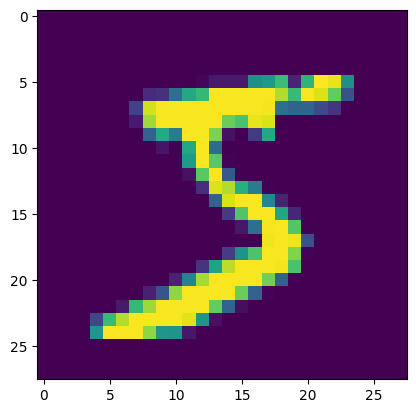

In [9]:
plt.imshow(single_image);

### Labeling

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train.shape

(60000,)

In [12]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [13]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
y_cat_train.shape

(60000, 10)

### Scaling and Reshaping

In [15]:
x_train.max()

np.uint8(255)

In [16]:
x_train.min()

np.uint8(0)

In [17]:
x_train = x_train / 255
x_test = x_test / 255

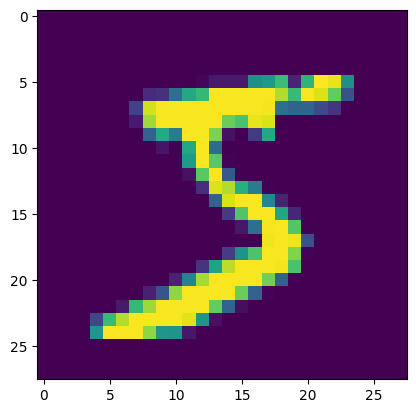

In [19]:
plt.imshow(x_train[0])

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

### Training a Custom Model

In [36]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

    Categorical Cross Entropy:
    Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation.

    y_true = [[0, 1, 0], [0, 0, 1]]
    y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

    Sparse Categorical Cross Entropy:
    Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as integers.

    y_true = [1, 2]
    y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [39]:
model.fit(x=x_train, y=y_cat_train, epochs=15, batch_size=128, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8783 - loss: 0.4121 - val_accuracy: 0.4258 - val_loss: 1.9263
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9747 - loss: 0.0834 - val_accuracy: 0.9888 - val_loss: 0.0363
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9802 - loss: 0.0617 - val_accuracy: 0.9893 - val_loss: 0.0318
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0453 - val_accuracy: 0.9889 - val_loss: 0.0347
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0433 - val_accuracy: 0.9920 - val_loss: 0.0230
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0372 - val_accuracy: 0.9907 - val_loss: 0.0284
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0356 - val_accuracy: 0.9910 - val_loss: 0.0273
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 

### Evaluation

In [40]:
history = pd.DataFrame(model.history.history)

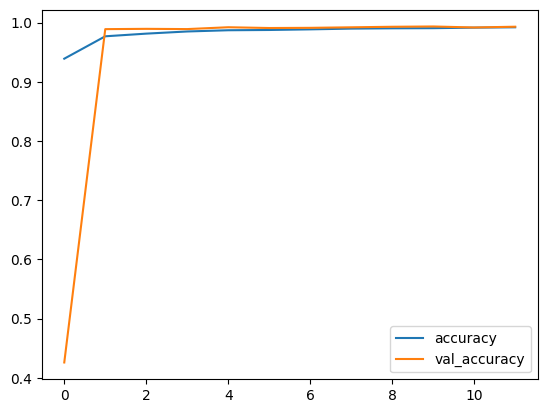

In [41]:
history[['accuracy', 'val_accuracy']].plot();

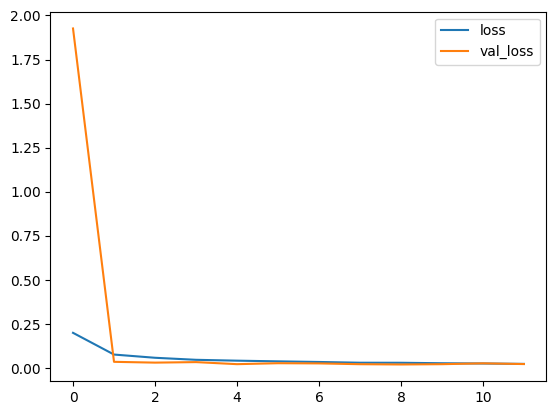

In [42]:
history[['loss', 'val_loss']].plot();

In [44]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'compile_metrics']
[0.021245326846837997, 0.9927999973297119]


In [45]:
predictions = np.argmax(model.predict(x_test), axis=1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [46]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



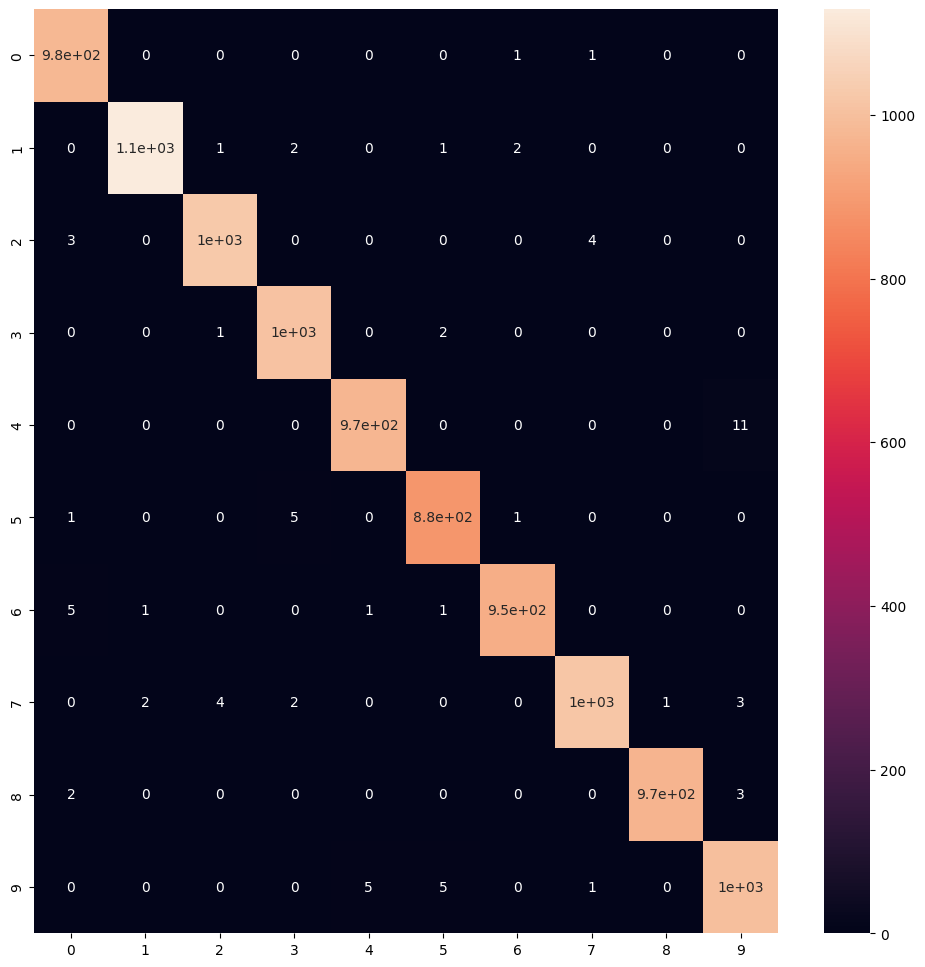

In [49]:
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

### Predict Classes

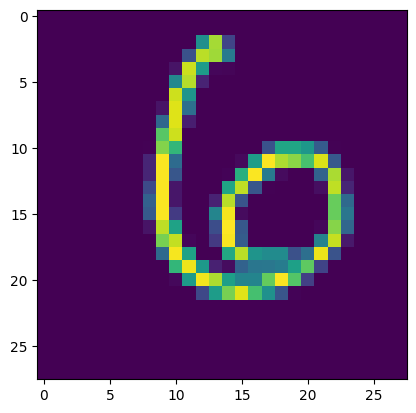

In [50]:
my_number = x_test[100]
plt.imshow(my_number.reshape(28, 28, 1));

In [51]:
prediction = np.argmax(model.predict(my_number.reshape(1, 28, 28, 1)), axis=1)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


array([6])